In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
df=pd.read_csv('titanic.csv', encoding='utf-8')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
#check null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
177/891

0.19865319865319866

In [58]:
#drop null values from age column
# df2=df.dropna(subset=['Age'])

df.dropna(subset=['Age'], inplace=True)

In [60]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

In [61]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'D33', 'B30', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'D47', 'B86',
       'F2', 'C2', 'B19', 'A7', 'C49', 'F4', 'B4', 'B80', 'A31', 'D36',
       'D15', 'C93', 'C78', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125',
       'C99', 'C118', 'D7', 'B49', 'D', 'C22 C26', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'E33', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'C52',
       'E44', 'A34', 'C104', 'C111', 'C92', 'E38', 'E12', 'E63', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',
       'C90', 'C126', 'C45', 'E8', 'B101', 'C46', 'D30', 'E121', 'D11',
       'E

In [65]:
#replace null values in Cabin column with 'Unknown'

df['Cabin'].fillna('NA', inplace=True)

df.dropna(subset=['Embarked'], inplace=True)

df.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [70]:
df['Age']=df['Age'].astype(int)

In [71]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S


In [72]:
df.to_csv('titanic_cleaned.csv', index=False)

In [75]:
df['Sex'].value_counts()

Sex
male      453
female    259
Name: count, dtype: int64

<Figure size 800x800 with 0 Axes>

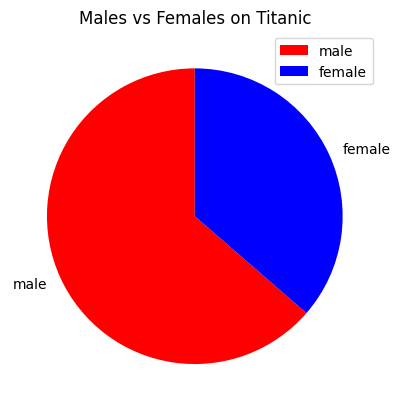

In [88]:
#EDA

#plot the number of males to females pie chart
# plt.figure(figsize=(8, 8))
# df['Sex'].plot(kind='pie', autopct='%1.1f%%', title='Males vs females on Titanic')

# plt.show()


data=df['Sex'].value_counts()   


# data.plot(kind='pie', autopct='%1.1f%%')


plt.figure(figsize=(8, 8))
fig,ax = plt.subplots()
ax.pie(data, labels=data.index, startangle=90, colors=['#FF0000', '#0000FF'])
ax.legend()
ax.set_title('Males vs Females on Titanic')

plt.show()

In [107]:
test=df["Age"].unique().tolist()
test.sort()
print(test)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 70, 71, 74, 80]


In [108]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S


In [109]:
#create bins
bins = [0, 20, 40, 60, 80]
labels = ['0-20', '21-40', '41-60', '61-80']

df['Age_bin']=pd.cut(df['Age'], bins=bins, labels=labels)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S,21-40
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,21-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S,21-40
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,21-40
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S,21-40


In [118]:
#check the number of person in age bins
binned=df['Age_bin'].value_counts()
binned


#order the bins
binned = binned.reindex(labels, fill_value=0)
binned

Age_bin
0-20     173
21-40    385
41-60    126
61-80     21
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

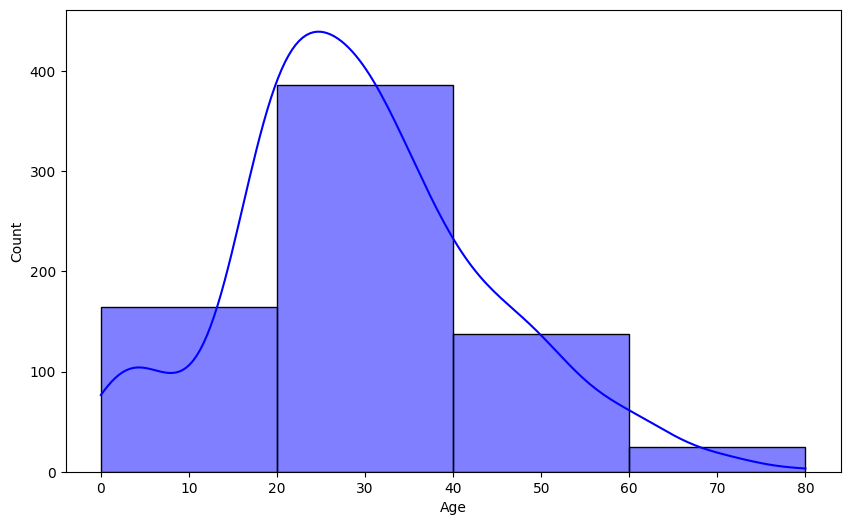

In [120]:
#histogram for distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=4, kde=True, color='blue')

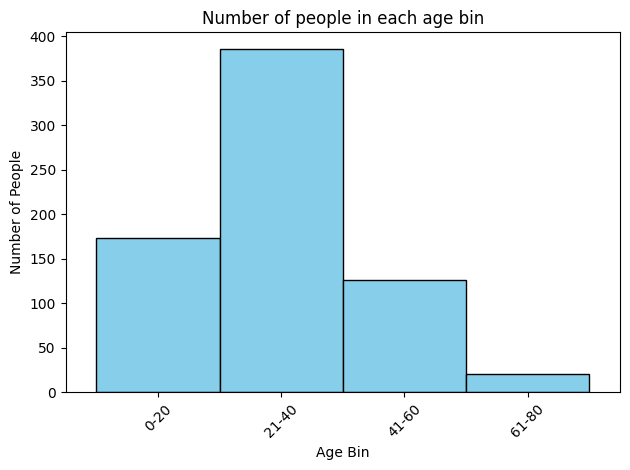

In [121]:
plt.figsize=(10, 6)
binned.plot(kind='bar',width=1, color='skyblue', edgecolor='black')


plt.title('Number of people in each age bin')
plt.xlabel('Age Bin')
plt.ylabel('Number of People')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [131]:
survival_counts = df['Survived'].value_counts()
survival_counts

#replace keys
survival_counts = survival_counts.rename({0: 'Did not survive', 1: 'Survived'})
survival_counts


Survived
Did not survive    424
Survived           288
Name: count, dtype: int64

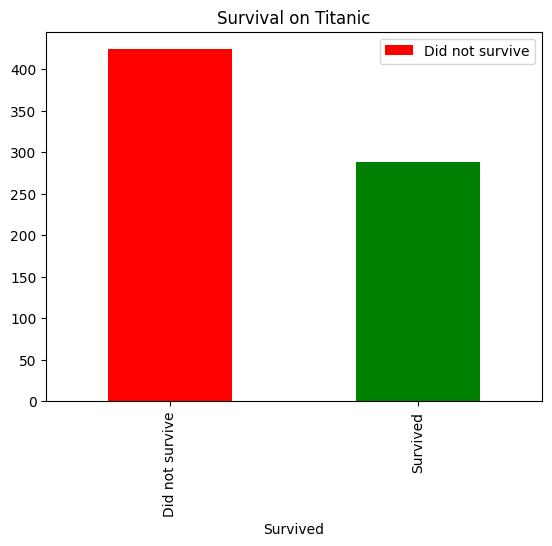

In [137]:
#bar plot to show who survived
plt.figsize=(10, 10)
plt.title('Survival on Titanic')
survival_counts.plot(kind='bar', color=['red', 'green'])
plt.legend(survival_counts.index)
plt.show()

In [138]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S,21-40
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,21-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S,21-40
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,21-40
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S,21-40


In [141]:
#stacked bar plot to show who survived by gender

survival_by_gender=df.groupby('Sex')['Survived'].value_counts().unstack()

survival_by_gender

Survived,0,1
Sex,,
female,64,195
male,360,93


In [142]:
survival_by_gender.columns = ['Did not survive', 'Survived']

survival_by_gender

,Did not survive,Survived
Sex,,
female,64,195
male,360,93


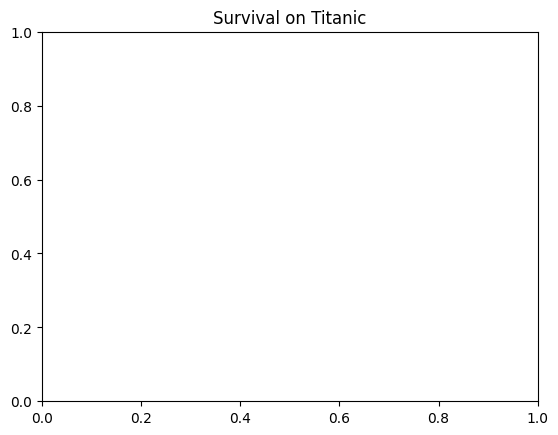

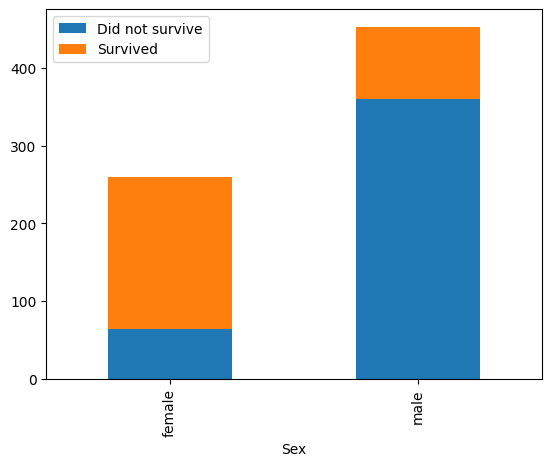

In [148]:
#bar plot to show who survived
plt.figsize=(10, 10)
plt.title('Survival on Titanic')
survival_by_gender.plot(kind='bar', stacked=True)
plt.show()

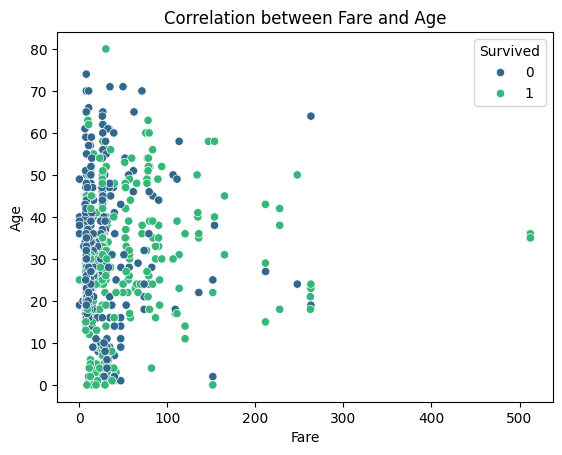

In [150]:
#correleation between fare and age

plt.title('Correlation between Fare and Age')
sns.scatterplot(x='Fare', y='Age', data=df, hue='Survived', palette='viridis')
plt.show()

In [151]:
#scale fare column between 0 and 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,Fare_scaled
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S,21-40,0.014151
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,21-40,0.139136
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S,21-40,0.015469
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,21-40,0.103644
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S,21-40,0.015713


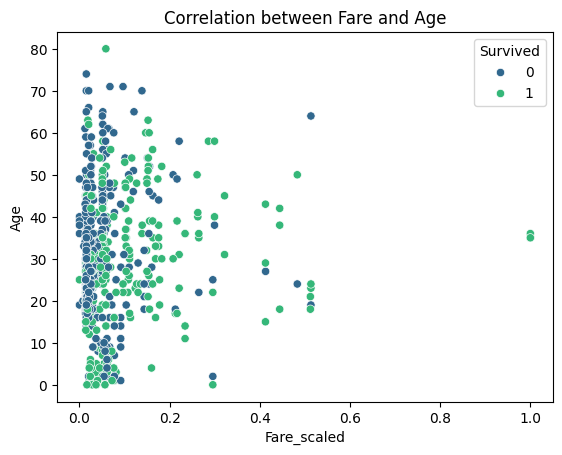

In [155]:
#correleation between fare and age

plt.title('Correlation between Fare and Age')
sns.scatterplot(x='Fare_scaled', y='Age', data=df, hue='Survived', palette='viridis')
plt.show()

In [ ]:
#one hot encoding for sex column
df= pd.get_dummies(df, columns=['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,Fare_scaled,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,NA,S,21-40,0.014151,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C85,C,21-40,0.139136,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,NA,S,21-40,0.015469,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,C123,S,21-40,0.103644,True,False
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,NA,S,21-40,0.015713,False,True


In [158]:
survival_by_gender

,Did not survive,Survived
Sex,,
female,64,195
male,360,93


In [ ]:
#survival rates for gender
male_survival= 93/(93+360)
female_survival= 164/(64+195)

male_survival*100


0.6332046332046332

In [161]:
female_survival*100

63.32046332046332

In [ ]:
#identify passenger with highest fare
highest_fare_passenger = df.loc[df['Fare'].idxmax()]